# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro


# 2. Collect and load data

In [2]:
df=pd.read_csv('bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
df.rename({'Unnamed: 0':'City','u':'1920','x':'1930'},axis=1,inplace=True)
df.head()

,City,1920,1930
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [4]:
df1 = df.iloc[::,1::]
df1.head()

,1920,1930
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1920    49 non-null     int64
 1   1930    49 non-null     int64
dtypes: int64(2)
memory usage: 912.0 bytes


# 3. Explore numeric variables - five number summary

In [6]:
df1.describe()

,1920,1930
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms


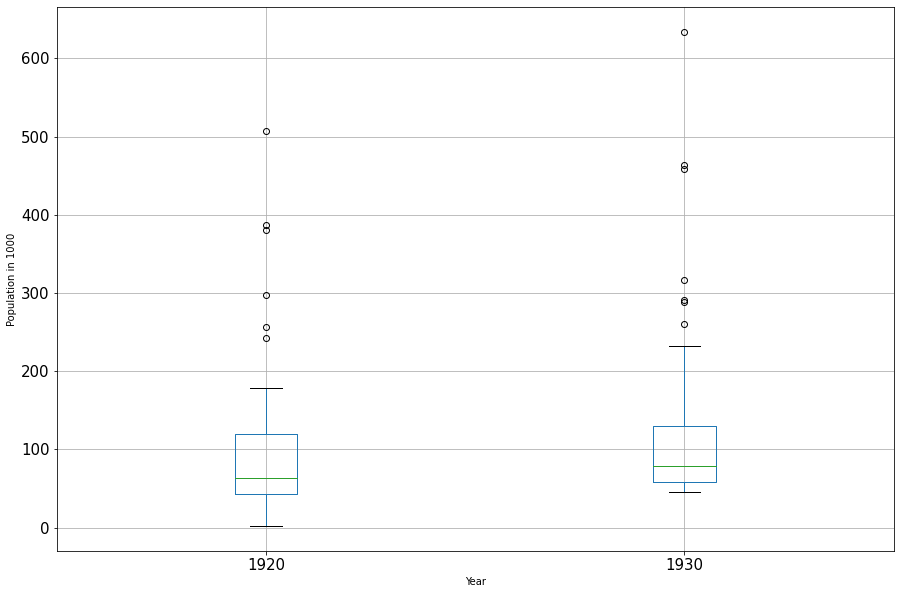

In [7]:
plt.figure(figsize=(15,10))
df1.boxplot(fontsize=15)
plt.xlabel('Year')
plt.ylabel('Population in 1000')
plt.show()

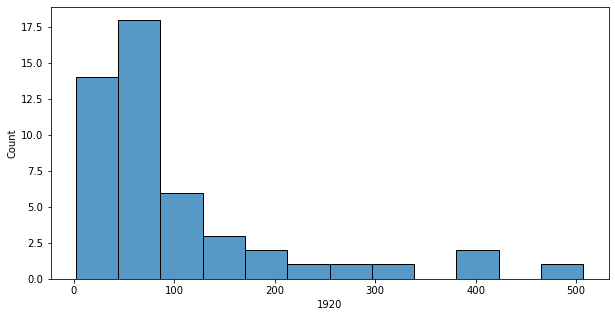

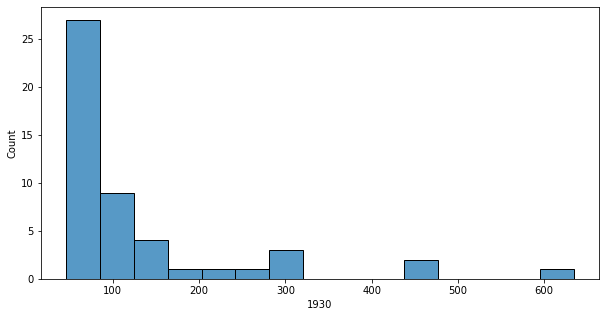

In [142]:
plt.figure(figsize=(10,5))
sns.histplot(df1['1920'])
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df1['1930'])
plt.show()

# 3b. Measure spread – variance and standard deviation

In [8]:
print('Variance :\n',df1.var(),sep='')
print('\nStandard Deviation :\n',df1.std(),sep='')

Variance :
1920    10900.416667
1930    15158.832483
dtype: float64

Standard Deviation :
1920    104.405061
1930    123.121211
dtype: float64


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

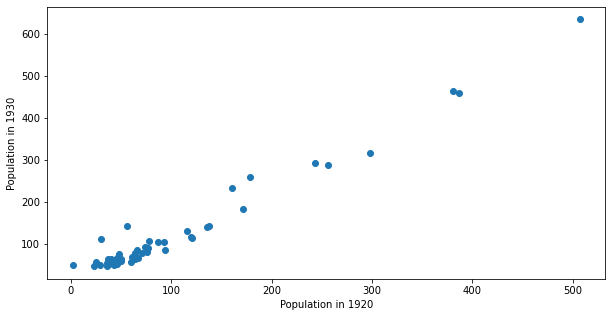

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(x=df1['1920'],y=df1['1930'])
plt.xlabel('Population in 1920')
plt.ylabel('Population in 1930')
plt.show()

In [10]:
pd.crosstab(df1['1920'],df1['1930'])

1930,46,48,50,52,53,54,57,58,60,61,63,64,65,67,69,75,77,79,80,85,86,89,93,104,105,106,111,113,115,130,139,142,143,183,232,260,288,291,317,459,464,634
1920,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [11]:
df1.shape

(49, 2)

In [12]:
X = df1['1920']
X.head()

0    138
1     93
2     61
3    179
4     48
Name: 1920, dtype: int64

In [13]:
Y = df1['1930']
Y.head()

0    143
1    104
2     69
3    260
4     75
Name: 1930, dtype: int64

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [14]:
df1.isna().sum()

1920    0
1930    0
dtype: int64

In [15]:
df1.corr()

,1920,1930
1920,1.000000,0.981742
1930,0.981742,1.000000


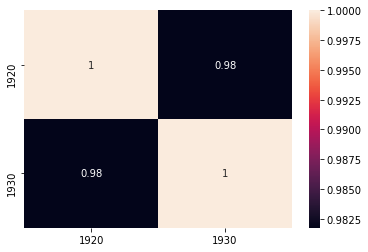

In [16]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print('x_train shape :',x_train.shape)
print('x_test shape :',x_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

x_train shape : (39,)
x_test shape : (10,)
y_train shape : (39,)
y_test shape : (10,)


In [18]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
print('x_train shape :',x_train.shape)
print('x_test shape :',x_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

x_train shape : (39, 1)
x_test shape : (10, 1)
y_train shape : (39,)
y_test shape : (10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('b0 :',lr.coef_)
print('b1 :',lr.intercept_)

b0 : [1.15945123]
b1 : 9.718455322828262


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [21]:
ypred_train = lr.predict(x_train)

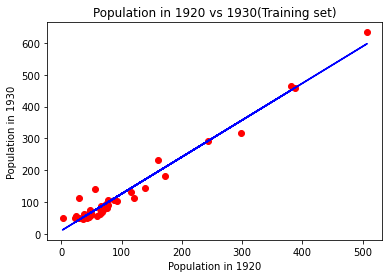

In [22]:
plt.scatter(x_train, y_train, color = 'red')     
plt.plot(x_train, ypred_train, color = 'blue')  
plt.title('Population in 1920 vs 1930(Training set)')
plt.xlabel('Population in 1920')
plt.ylabel('Population in 1930')
plt.show()

- Above plot is for the Training set. 

In [23]:
ypred_test = lr.predict(x_test)

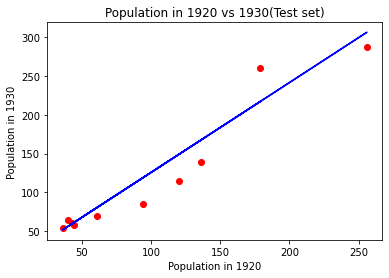

In [26]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, ypred_test, color = 'blue')
plt.title('Population in 1920 vs 1930(Test set)')
plt.xlabel('Population in 1920')
plt.ylabel('Population in 1930')
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [27]:
from sklearn.metrics import mean_squared_error,r2_score

In [28]:
rmse_test = np.sqrt(mean_squared_error(y_test, ypred_test))
rmse_train = np.sqrt(mean_squared_error(y_train, ypred_train))
print('RMSE for testing data :',round(rmse_test,5))
print('RMSE for Training data :',round(rmse_train,5))

RMSE for testing data : 23.38524
RMSE for Training data : 23.18944


In [29]:
r2_test = r2_score(y_test,ypred_test)
r2_train = r2_score(y_train,ypred_train)
print('R2 for testing data :',round(r2_test,5))
print('R2 for Training data :',round(r2_train,5))

R2 for testing data : 0.91819
R2 for Training data : 0.96822


# 11. Calculating the accuracy of the model for both training and test data set



In [30]:
score_train = lr.score(x_train,y_train)
print('Score for Training dataset :',round(score_train,5))

Score for Training dataset : 0.96822


In [31]:
score_test = lr.score(x_test,y_test)
print('Score for Testing dataset :',round(score_test,5))

Score for Testing dataset : 0.91819
